![Quantum Computing](./images/qimage.jpeg)

## Quantum AI Model

### Introduction

#### Quantum computing is evolving rapidly, though access to quantum hardware remains limited. To demonstrate quantum principles, researchers have developed quantum-inspired algorithms that run on classical computers. This approach allows for exploration and validation of quantum concepts, advancing the field without requiring actual quantum hardware, while showcasing the potential efficiency gains of quantum computing.

### Importing all the required Modules 

#### PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry. Train a quantum computer the same way as a neural network.

In [1]:
import pennylane as qml
import numpy as np #Handling arrays and performing mathematical computations using numerical operations.
import matplotlib.pyplot as plt #Create visualizations and plots

### Defining the Molecule

In [2]:
moleculeSymbols = ["H", "H"] # Represents the atoms represent in the molecule
# Represents the distance between the two hydrogen atoms in terms of their coordinates.
moleculeCoordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.74]) # The bond length of H2 is 0.75Å 

### Generate the Hamiltonian for the molecule

#### The Hamiltonian expression represents the total energy of a system, in this case, qubits simulating a molecule in the quantum realm. It plays a crucial role in solving the Schrödinger equation, which is fundamental to quantum mechanics. By solving this equation, we can predict how molecules evolve or change over time. This approach is essential for understanding and simulating molecular behavior at the quantum level, providing insights into various chemical and physical processes.

In [3]:
# Generates the Hamiltonian for the Hydrogen molecule
# Qubits is the number of Quantum bits needed to simulate the molecule
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(
    moleculeSymbols, moleculeCoordinates
)

### Defining the Quantum Device

In [4]:
# Similar to choosing a machine learning model
# Here, the selection of a specific quantum model occurs
qdev = qml.device("default.qubit", wires=qubits)

### Variational Quantum EigenSolver

#### A quantum algorithm used to find the ground state energy of a quantum system. It combines quantum and classical computations to optimize a parameterized quantum circuit.

### Variational Quantum Circuit

### Ansatz - The quantum ansatz is a parameterized quantum circuit that generates a range of quantum states by adjusting its parameters.

In [5]:
def ansatz(params, wires):
    # Initializes the quantum circuit to the |0> state for all qubits
    qml.BasisState(np.array([0] * qubits), wires=wires)
    for i in range(qubits):
        # Gives rotation to all the qubit around y-axis 
        qml.RY(params[i], wires=wires[i]) 
    for i in range(qubits - 1):
        # In Basis State the CNOT works specially |x>|0> -> |x>|0>
        # Normaly it is |x>|y> -> |x>|x⊕y>
        qml.CNOT(wires=[wires[i], wires[i + 1]]) # Consecutive qubits are entangled

### Defining the Cost Function

In [6]:
# Decorator that converts the function into a QNode
# Enabling it to execute on the quantum device
@qml.qnode(qdev)
def cost_fn(params):
    ansatz(params, wires=range(qubits)) 
    #Returns the expected value of the Hamiltonian expression, which represents the molecule's ground state energy.
    return qml.expval(hamiltonian) 

### Setting Initial Parameters and Optimizer

In [7]:
np.random.seed(42) #Fixed seed for the random number generator
# `requires_grad = True` allows parameters to be adjusted during optimization
params = qml.numpy.random.random(qubits, requires_grad=True)
# Adjust the parameters to minimize the cost function
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)

### Optimization Loop

In [8]:
# Number of optimization steps
maxIterations = 100  # Maximum number of iterations for the optimization loop
convergenceTolerance = 1e-06       # Convergence tolerance to determine when to stop the optimization

# List to store the energy values at each optimization step
energies = []

# Optimization loop
for n in range(maxIterations):
    # Perform an optimization step and get updated parameters and the previous energy value
    params, prev_energy = optimizer.step_and_cost(cost_fn, params)

    # Compute the current energy value using the updated parameters
    energy = cost_fn(params)
    energies.append(energy)  # Store the energy value for analysis

    # Check for convergence based on the change in energy
    if np.abs(energy - prev_energy) < convergenceTolerance:
        break  # Exit the loop if the change in energy is below the tolerance

    # Print the current step number and energy value
    print(f"Step = {n}, Energy = {energy:.8f} Ha")

# Print the final ground state energy after optimization
print(f"Final ground state energy = {energy:.8f} Ha")


Step = 0, Energy = 1.40040436 Ha
Step = 1, Energy = 1.39377357 Ha
Step = 2, Energy = 1.38602898 Ha
Step = 3, Energy = 1.37688214 Ha
Step = 4, Energy = 1.36595377 Ha
Step = 5, Energy = 1.35274042 Ha
Step = 6, Energy = 1.33657169 Ha
Step = 7, Energy = 1.31655916 Ha
Step = 8, Energy = 1.29154373 Ha
Step = 9, Energy = 1.26006129 Ha
Step = 10, Energy = 1.22037054 Ha
Step = 11, Energy = 1.17062226 Ha
Step = 12, Energy = 1.10927724 Ha
Step = 13, Energy = 1.03584026 Ha
Step = 14, Energy = 0.95177135 Ha
Step = 15, Energy = 0.86105933 Ha
Step = 16, Energy = 0.76974278 Ha
Step = 17, Energy = 0.68420726 Ha
Step = 18, Energy = 0.60918981 Ha
Step = 19, Energy = 0.54677922 Ha
Step = 20, Energy = 0.49675027 Ha
Step = 21, Energy = 0.45755201 Ha
Step = 22, Energy = 0.42720211 Ha
Step = 23, Energy = 0.40380829 Ha
Step = 24, Energy = 0.38577584 Ha
Step = 25, Energy = 0.37184079 Ha
Step = 26, Energy = 0.36103130 Ha
Step = 27, Energy = 0.35261019 Ha
Step = 28, Energy = 0.34602081 Ha
Step = 29, Energy = 0.34

### Visualize the results

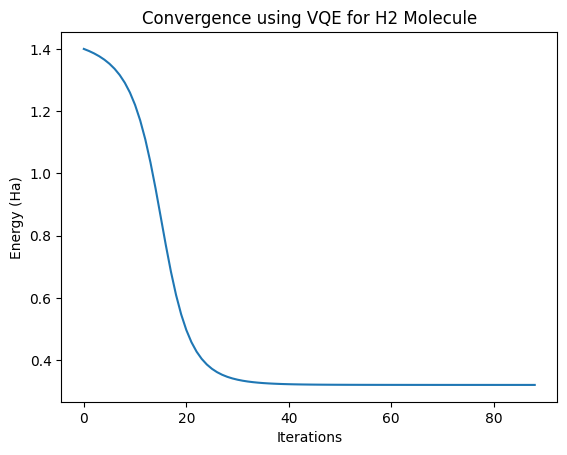

In [9]:
iterations = range(len(energies))

plt.plot(iterations, energies)
plt.xlabel('Iterations')
plt.ylabel('Energy (Ha)')
plt.title('Convergence using VQE for H2 Molecule')
plt.show()

### Summary

#### The notebook demonstrates the application of the Variational Quantum Eigensolver (VQE) algorithm to find the ground state energy of the H2 molecule. Initially, necessary libraries such as numpy, matplotlib, qiskit, and components from qiskit.chemistry are imported. The H2 molecule's geometry is defined, and the molecular data is converted into a Hamiltonian, representing the system's energy. A parameterized quantum circuit is constructed to represent the trial wavefunction, and the VQE algorithm is employed to optimize the parameters of the quantum circuit using classical optimizers like COBYLA or SPSA. The optimization process is executed, and energy values are extracted. Finally, the convergence of energy values over iterations is plotted, illustrating how the VQE algorithm approaches the ground state energy.



### Future Work

#### Future work includes exploring and benchmarking various classical optimizers to improve VQE efficiency and accuracy, and extending the approach to complex molecules to test scalability. Implementing error mitigation strategies is essential for addressing quantum hardware noise and errors. Combining VQE with other algorithms like QAOA could provide more robust solutions. Parallel execution of quantum circuits and optimizations can reduce computation time, while testing on different quantum processors will provide performance insights. Integrating machine learning for predicting better initial parameters may also speed up convergence.